___
<img src="https://business.twitter.com/content/dam/business-twitter/basics/twitter-phone.jpg.twimg.1920.jpg" width=800 height=500 />

<div style="text-align:center;color:#add8e6;">

# who is more influential in a social network?
- https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network/data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [6]:
train_data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


# Data pre-process

Choice : A label '1' means A is more influential than B. 0 means B is more influential than A

In [7]:
y = train_data['Choice']

In [8]:
train_data.drop(columns='Choice', inplace=True)

In [9]:
print('Frequencies of each label in the dataset: ')
y.value_counts(normalize=True)

Frequencies of each label in the dataset: 


1    0.509455
0    0.490545
Name: Choice, dtype: float64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   A_follower_count     5500 non-null   int64  
 1   A_following_count    5500 non-null   int64  
 2   A_listed_count       5500 non-null   int64  
 3   A_mentions_received  5500 non-null   float64
 4   A_retweets_received  5500 non-null   float64
 5   A_mentions_sent      5500 non-null   float64
 6   A_retweets_sent      5500 non-null   float64
 7   A_posts              5500 non-null   float64
 8   A_network_feature_1  5500 non-null   int64  
 9   A_network_feature_2  5500 non-null   float64
 10  A_network_feature_3  5500 non-null   float64
 11  B_follower_count     5500 non-null   int64  
 12  B_following_count    5500 non-null   int64  
 13  B_listed_count       5500 non-null   int64  
 14  B_mentions_received  5500 non-null   float64
 15  B_retweets_received  5500 non-null   f

In [11]:
train_data.describe().round(decimals=2)

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,...,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00,5500.00
mean,649883.95,12658.95,5952.45,2666.03,1032.37,6.01,1.11,9.09,5267.77,84.81,...,12738.26,5903.15,2554.60,997.15,6.10,1.11,9.51,5254.93,85.02,3745.18
std,2028787.44,49008.67,17339.14,29165.43,10954.95,9.52,1.91,18.31,28946.78,104.07,...,50054.52,16298.46,25088.73,9342.01,9.73,1.94,19.42,26778.82,106.69,5518.40
min,16.00,0.00,0.00,0.10,0.10,0.10,0.10,0.10,0.00,0.00,...,0.00,0.00,0.10,0.10,0.10,0.10,0.10,0.00,0.00,0.00
25%,2663.75,322.00,85.00,3.45,0.72,0.36,0.10,0.63,12.00,14.99,...,322.00,75.00,3.26,0.71,0.36,0.10,0.82,11.00,15.18,1206.50
50%,45589.00,778.00,932.00,48.77,14.03,2.30,0.34,3.56,195.00,54.93,...,773.00,890.00,48.77,14.03,2.25,0.34,3.34,190.00,54.93,2206.42
75%,392738.00,2838.00,6734.00,349.82,118.70,7.20,1.32,10.69,1323.00,109.70,...,2838.00,6734.00,374.37,107.08,6.87,1.32,10.60,1323.00,112.19,4349.91
max,36543194.00,1165830.00,549144.00,1145218.99,435825.87,76.81,16.29,193.07,920838.00,1121.00,...,664324.00,549144.00,1145218.99,435825.87,76.81,16.29,193.07,920838.00,1861.58,75526.08


In [12]:
for col in train_data:
    train_data[col].fillna(0, inplace = True)

Create new columns to calculate the difference between A and  B

In [16]:
def get_substracted_features(df):
    combined = pd.DataFrame()
    filter_A =[col for col in df if col.startswith('A')]
    filter_B =[col for col in df if col.startswith('B')]
    length=len(filter_A)
    for i in range(length):
        newcolumn = filter_A[i].replace('A','s')
        combined[newcolumn] = df[filter_A[i]] - df[filter_B[i]]
    return combined
  

In [13]:
def get_ratio_features(df):
    combined = pd.DataFrame()
    for col in df:
        combined['r_follower_count_A'] = df['A_follower_count'] / df['A_following_count']
        combined['r_follower_count_B'] = df['B_follower_count'] / df['B_following_count']
        combined['r_mentions_A'] = df['A_mentions_received'] / df['A_mentions_sent']
        combined['r_mentions_B'] = df['B_mentions_received'] / df['B_mentions_sent']
        combined['r_RT_A'] = df['A_retweets_received'] / df['A_retweets_sent']
        combined['r_RT_B'] = df['B_retweets_received'] / df['B_retweets_sent']
        combined['r_postlist_A'] = df['A_posts'] / df['A_listed_count']
        combined['r_postlist_B'] = df['B_posts'] / df['B_listed_count']
            
    return combined

In [14]:
def get_process_features(df):
    X_subst_features = get_substracted_features(np.log(df+1))     
    X_ratio_features = get_ratio_features( df+1)    
    X_features = pd.concat([np.log(df+1), X_subst_features, X_ratio_features], axis=1)

    X_features['r_follower_count_A'] = np.log(X_features['r_follower_count_A'])
    X_features['r_follower_count_B'] = np.log(X_features['r_follower_count_B'])
    X_features['r_mentions_A'] = np.log(X_features['r_mentions_A'])
    X_features['r_mentions_B'] = np.log(X_features['r_mentions_B'])
    X_features['r_RT_A'] = np.log(X_features['r_RT_A'])
    X_features['r_RT_B'] = np.log(X_features['r_RT_B'])
    X_features['r_postlist_A'] = np.log(X_features['r_postlist_A'])
    X_features['r_postlist_B'] = np.log(X_features['r_postlist_B'])
    
    return X_features

In [17]:
train_data = get_process_features(train_data)

In [18]:
train_data.columns

Index(['A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3',
       's_follower_count', 's_following_count', 's_listed_count',
       's_mentions_received', 's_retweets_received', 's_mentions_sent',
       's_retweets_sent', 's_posts', 's_network_feature_1',
       's_network_feature_2', 's_network_feature_3', 'r_follower_count_A',
       'r_follower_count_B', 'r_mentions_A', 'r_mentions_B', 'r_RT_A',
       'r_RT_B', 'r_postlist_A', 'r_postlist_B'],
      dtype='object')

<div style="direction:rtl; text-align:left; font-size:20px">
    data scaling

In [19]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(df, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(df.values)
    df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
    return df, scaler

In [20]:
train_data, scaler = preprocess_data(train_data)

In [21]:
features_names = ['s_following_count', 's_listed_count', 's_mentions_received',
       's_retweets_received', 's_mentions_sent', 's_retweets_sent', 's_posts',
       's_network_feature_1', 's_network_feature_2', 's_network_feature_3',
       'r_follower_count_A', 'r_follower_count_B', 'r_mentions_A',
       'r_mentions_B', 'r_RT_A', 'r_RT_B', 'r_postlist_A', 'r_postlist_B']

In [22]:
def plot_histograms(X_features, features_names, Y,  cols = 3, figsize=(8,20), **args):
    fig = plt.figure(figsize=figsize)
    total = len(features_names)
    rows = total // cols 
    rows += total % cols
    position = range(1,total + 1)
    for k in range(total):
        ax = fig.add_subplot(rows,cols,position[k])
        plt.hist(X_features[features_names[k]].values[Y==0], label='Zero', **args)
        plt.hist(X_features[features_names[k]].values[Y==1], label='One', **args)
        plt.title(features_names[k])
        plt.legend(loc='best')
        plt.axis('off')
    plt.show()

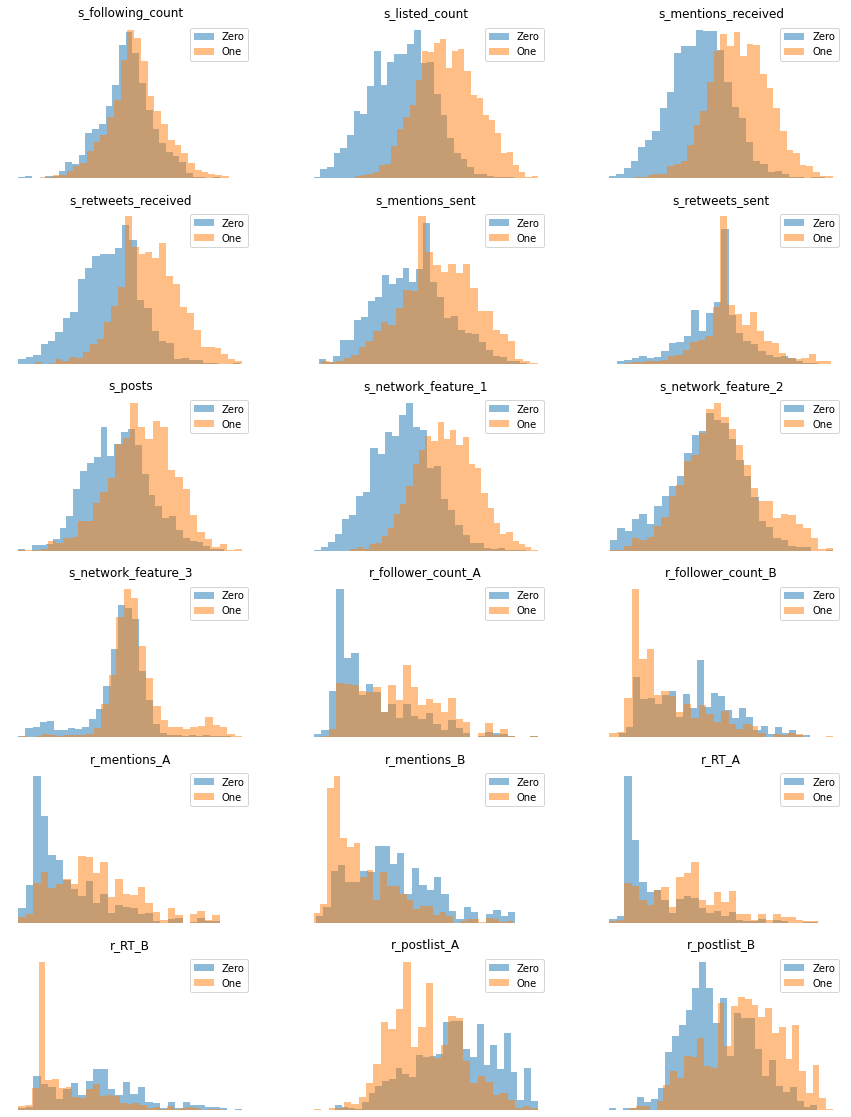

In [23]:
plot_histograms(train_data, features_names, y.values, cols = 3, figsize=(15,20), alpha=.5, bins=30)

# data modeling

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model1 =LogisticRegression()
model1.fit(train_data,y)
scores = cross_val_score(model1,train_data,y,cv=5)

In [25]:
scores.mean()

0.7696363636363637

In [26]:
model2 =LogisticRegression(C=1)
model2.fit(train_data,y)
scores =cross_val_score(model2,train_data,y,cv=5)
scores.mean()

0.7696363636363637

 Grid Search to find the best C value 

In [27]:
param_grid = {
 'C':[0.0001, 0.001, 0.01 , 0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 10., 100.],
 'fit_intercept': [True, False]
}

In [28]:
from sklearn.model_selection import GridSearchCV

gsearch1 =GridSearchCV(model1,param_grid)


gsearch1.fit(train_data,y)

C:\Users\samah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                               1.0, 10.0, 100.0],
                         'fit_intercept': [True, False]})

In [29]:
gsearch1.best_params_

{'C': 100.0, 'fit_intercept': False}

In [30]:
gsearch1.best_score_

0.7707272727272728

In [31]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
 'min_samples_split':[2,3,5],
 'min_samples_leaf':[2,3,5],
 'max_features': ['auto', 'log2', 'sqrt']
}
modelRandom=RandomForestClassifier()
gsearch2 =GridSearchCV(modelRandom,param_grid)


gsearch2.fit(train_data,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5]})

In [32]:
gsearch2.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3}

In [33]:
gsearch2.best_score_

0.7818181818181819

In [34]:
model = LogisticRegression(**gsearch1.best_params_)

In [35]:
model.fit(train_data, y)

LogisticRegression(C=100.0, fit_intercept=False)

In [36]:
test_data = pd.read_csv('test.csv')

In [37]:
test_data = get_process_features(test_data)

In [38]:
test_data = pd.DataFrame(scaler.transform(test_data.values), columns=test_data.columns)

In [39]:
test_data['Choice'] = model.predict(test_data)

In [40]:
test_data.index.name = 'Id'

In [41]:
test_data.index = test_data.index+1

In [42]:
test_data['Choice'].head()

Id
1    0
2    1
3    0
4    0
5    1
Name: Choice, dtype: int64

In [43]:
test_data['Choice'].to_csv('./social_media_analysis_submission.csv', header=True)